In [2]:
!pip install highlight_text
from highlight_text import ax_text,fig_text

import mplsoccer
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
from highlight_text import htext

from scrape import scrape_data_fbref as fbref
from scrape import scrape_data_understat as understat

zsh:1: command not found: pip


In [3]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [18]:
def draw_xG_pitch(df, ax):
    #SETTING UP THE MPL AXIS FOR THE FIRST SEASON
    pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta', pitch_color='black')
    ax.patch.set_facecolor(background)
    pitch.draw(ax=ax)

    #PLOTTING OTHER SHOTS
    pitch.scatter(df[df['Result']!='Goal']['X'],
                df[df['Result']!='Goal']['Y'],
                s=np.sqrt(df[df['Result']!='Goal']['xG'])*100,
                marker='o',
                alpha=0.7,
                edgecolor='black',
                facecolor='white',
                ax=ax,
                label='Não Golo'
    )

    pitch.scatter(df[df['Result']=='Goal']['X'],
                df[df['Result']=='Goal']['Y'],
                s=np.sqrt(df[df['Result']=='Goal']['xG'])*100,
                marker='o',
                alpha=0.9,
                edgecolor='black',
                facecolor=filler,
                ax=ax,
                label='Golo'
    )

    # ADDING THE LEGEND
    ax.legend(loc='lower right').get_texts()[0].set_color("black")
    ax.text(25,61,'Golos : '+str(len(df[df['Result']=='Goal'])), weight='bold', size=12, color='white', fontfamily=body_font)
    ax.text(25,64,f"xG : {round(sum(df['xG']),2)}", weight='bold', size=12, color='white', fontfamily=body_font)
    ax.text(25,58,'Remates : '+str(len(df)), weight='bold', size=12, color='white', fontfamily=body_font)

In [23]:

def draw_xG_pitch(df, ax):
    #SETTING UP THE MPL AXIS FOR THE FIRST SEASON
    pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta', pitch_color=background)
    ax.patch.set_facecolor(background)
    pitch.draw(ax=ax)

    #PLOTTING OTHER SHOTS
    pitch.scatter(df[df['Result']!='Goal']['X'],
                df[df['Result']!='Goal']['Y'],
                s=np.sqrt(df[df['Result']!='Goal']['xG'])*100,
                marker='o',
                alpha=0.7,
                edgecolor='black',
                facecolor='white',
                ax=ax,
                label='Não Golo'
    )

    pitch.scatter(df[df['Result']=='Goal']['X'],
                df[df['Result']=='Goal']['Y'],
                s=np.sqrt(df[df['Result']=='Goal']['xG'])*100,
                marker='o',
                alpha=0.9,
                edgecolor='black',
                facecolor='yellow',
                ax=ax,
                label='Golo'
    )

    # ADDING THE LEGEND
    ax.legend(loc='lower right').get_texts()[0].set_color(background)
    ax.text(25,61,'Golos : '+str(len(df[df['Result']=='Goal'])), weight='bold', size=12, color=text_color, fontfamily=body_font)
    ax.text(25,64,f"xG : {round(sum(df['xG']),2)}", weight='bold', size=12, color=text_color, fontfamily=body_font)
    ax.text(25,58,'Remates : '+str(len(df)), weight='bold', size=12, color=text_color, fontfamily=body_font)

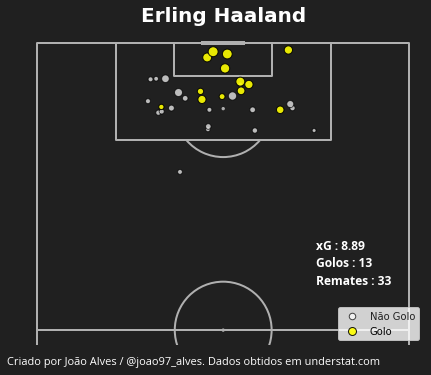

In [44]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,5))
ax.axis('off')
fig.set_facecolor(background)

df_understat = understat.readfromurl("https://understat.com/player/8260")

#ax = fig.add_axes([0, 0.05, 0.45, 0.8])
df_fil = df_understat.loc[df_understat['Season']==2019]
draw_xG_pitch(df_fil, ax)
ax.set_title("Erling Haaland", weight="bold", fontsize=20, fontfamily=title_font, color=text_color)

# ADDING INFO
fig.text(0.25, -0.025, "Criado por João Alves / @joao97_alves. Dados obtidos em understat.com",
        fontsize=11, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("example_shot_map.png", bbox_inches='tight', dpi=300) 